In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from nltk import word_tokenize
import string
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import datetime

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maidu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [123]:
df = pd.read_csv('Aug30th_all_articles_bin_graded.csv')
print(df.shape)
print(df.dtypes)
df.head()

(1329, 6)
binary_score (1:good   0: bad)    float64
news_title                         object
news_writer                        object
news_written_date                  object
news_text                          object
news_url                           object
dtype: object


,binary_score (1:good 0: bad),news_title,news_writer,news_written_date,news_text,news_url
0,1.0,"Fewer than 2,000 new virus cases in Tokyo for ...",['THE ASAHI SHIMBUN'],"August 30, 2021 at 18:30 JST","Tokyo reported 1,915 fresh cases of COVID-19 ...",https://www.asahi.com//ajw/articles/14429591
1,0.0,COVID-19 cases (Aug. 29),['THE ASAHI SHIMBUN'],"August 30, 2021 at 11:30 JST",NaN,https://www.asahi.com//ajw/articles/14429351
2,0.0,Record virus cases for a Sunday in Osaka; Toky...,['THE ASAHI SHIMBUN'],"August 29, 2021 at 18:35 JST",Authorities in Osaka Prefecture on Aug. 29 re...,https://www.asahi.com//ajw/articles/14428889
3,0.0,COVID-19 cases (Aug. 28),['THE ASAHI SHIMBUN'],"August 29, 2021 at 11:30 JST",NaN,https://www.asahi.com//ajw/articles/14428777
4,0.0,19 COVID-19 deaths in Tokyo; serious cases hit...,['THE ASAHI SHIMBUN'],"August 28, 2021 at 19:00 JST",There was good news and bad on the COVID-19 f...,https://www.asahi.com//ajw/articles/14428381


### Removing empty news_text

In [126]:
df = df.dropna()
print(df.shape)
df.head()

(964, 6)


,binary_score (1:good 0: bad),news_title,news_writer,news_written_date,news_text,news_url
0,1.0,"Fewer than 2,000 new virus cases in Tokyo for ...",['THE ASAHI SHIMBUN'],"August 30, 2021 at 18:30 JST","Tokyo reported 1,915 fresh cases of COVID-19 ...",https://www.asahi.com//ajw/articles/14429591
2,0.0,Record virus cases for a Sunday in Osaka; Toky...,['THE ASAHI SHIMBUN'],"August 29, 2021 at 18:35 JST",Authorities in Osaka Prefecture on Aug. 29 re...,https://www.asahi.com//ajw/articles/14428889
4,0.0,19 COVID-19 deaths in Tokyo; serious cases hit...,['THE ASAHI SHIMBUN'],"August 28, 2021 at 19:00 JST",There was good news and bad on the COVID-19 f...,https://www.asahi.com//ajw/articles/14428381
6,0.0,Japan breaks record of serious COVID-19 cases ...,['THE ASAHI SHIMBUN'],"August 27, 2021 at 18:50 JST","Tokyo confirmed 4,227 new COVID-19 cases on A...",https://www.asahi.com//ajw/articles/14427606
7,0.0,"Metal substance tainted Moderna jabs, dealing ...",['THE ASAHI SHIMBUN'],"August 27, 2021 at 17:55 JST",The foreign substance found in Moderna's COVI...,https://www.asahi.com//ajw/articles/14427323


(array([734.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 230.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

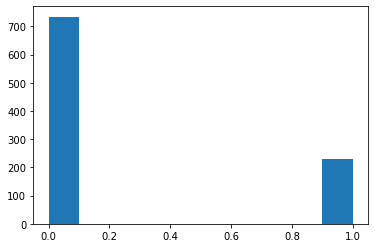

In [127]:
plt.hist(df['binary_score (1:good   0: bad)'])

In [128]:
punctuation = set(string.punctuation) # ,.:''
wordnet_lemmatizer = WordNetLemmatizer()#runs -> run
stopwords_list = stopwords.words('english')#is, the, a, are
stopwords_list.append('br') #linebreak in html, needs removal

In [129]:
def text_prep(text):
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('[^a-z\s]', '', text.lower()) #lower text
    
    #remove punctuation
    punc_removed = [char for char in text if char not in punctuation]
    punc_removed = ''.join(punc_removed)

    #remove stopwords
    no_stopword = [word for word in punc_removed.split() if word not in stopwords_list]
    
    #lemmatizing (runs -> run)
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in no_stopword]
    lemmatized = np.array(lemmatized)
    return lemmatized

In [130]:
df['news_text']

0        Tokyo reported 1,915 fresh cases of COVID-19 ...
2        Authorities in Osaka Prefecture on Aug. 29 re...
4        There was good news and bad on the COVID-19 f...
6        Tokyo confirmed 4,227 new COVID-19 cases on A...
7        The foreign substance found in Moderna's COVI...
                              ...                        
1321     Japan on Sept. 8 will partially reopen busine...
1323     While Tokyo recorded less than 200 new COVID-...
1325     Tokyo confirmed 100 new COVID-19 infections o...
1326     Health centers in Tokyo will soon have a new ...
1328     Japanese people have taken to wearing face ma...
Name: news_text, Length: 964, dtype: object

In [131]:
text_prep(df['news_text'][710])

array(['tokyo', 'confirmed', 'case', 'novel', 'coronavirus', 'infection',
       'feb', 'second', 'consecutive', 'day', 'number', 'new', 'patient',
       'exceed', 'daily', 'average', 'week', 'feb', 'came', 'percent',
       'daily', 'average', 'previous', 'week', 'tokyo', 'metropolitan',
       'government', 'official', 'anxiously', 'hope', 'daily', 'average',
       'given', 'sevenday', 'period', 'stay', 'percent', 'lower',
       'preceding', 'week', 'capital', 'remains', 'state', 'emergency',
       'least', 'march', 'new', 'patient', 'people', 'largest', 'age',
       'group', 'followed', 'new', 'patient', 'aged', 'older', 'number',
       'serious', 'case', 'stood', 'one', 'previous', 'day', 'tokyo',
       'defines', 'serious', 'case', 'requiring', 'ventilator',
       'extracorporeal', 'membrane', 'oxygenation', 'ecmo', 'device',
       'circulates', 'blood', 'artificial', 'lung'], dtype='<U14')

In [132]:
X_train, X_test, y_train, y_test = train_test_split( df['news_text'], df['binary_score (1:good   0: bad)'], test_size=0.33, random_state=42)

In [133]:
X_train

1233     Tokyo logged 108 newly confirmed novel corona...
249      IZUMISANO, Osaka Prefecture--A second member ...
374      Tokyo confirmed 535 fresh cases of COVID-19 o...
1165     SAPPORO--Hokkaido Prefecture upped its alert ...
94       The government is expanding coverage of pre-e...
                              ...                        
147      Tokyo recorded its highest number of COVID-19...
369      WASHINGTON--U.S. health officials and the Sta...
1164     Japan marked a grim milestone on Oct. 29 as t...
576      Tokyo confirmed 306 new COVID-19 cases on Apr...
142      Tokyo confirmed 1,979 new COVID-19 cases on J...
Name: news_text, Length: 645, dtype: object

In [134]:
cv= CountVectorizer(binary=True, analyzer = text_prep, min_df = 10, max_df = 0.95)
cv.fit_transform(df['news_text'].values)
train_feature_set=cv.transform(X_train.values)
test_feature_set=cv.transform(X_test.values)


In [135]:
train_feature_set=cv.transform(X_train.values)
test_feature_set=cv.transform(X_test.values)

In [136]:
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)


In [137]:
y_pred = np.array(y_pred)
y_test = np.array(y_test)

In [138]:
type(y_test)

numpy.ndarray

In [139]:
y_test

array([0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [141]:
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
#print("F1: ",round(metrics.f1_score(y_test, y_pred)))

Accuracy:  0.721
F1:  0.0


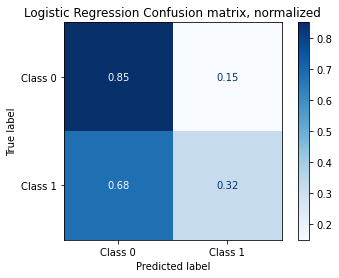

In [142]:
disp = metrics.plot_confusion_matrix(lr, test_feature_set, y_test,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, normalized');

In [149]:
article1='''Tokyo on Aug. 31 confirmed 15 deaths from COVID-19 among patients in their 40s to 90s and 2,909 new cases of infection, down 1,311 from a week ago. 
The tally marked the ninth consecutive day for the number of new infections in the capital to drop from the same day a week earlier.
It brought Tokyo's daily average of new infections over the week through Aug. 31 to 3,520.7, or 75.9 percent of the figure for the preceding week, according to metropolitan government officials.
The average number of diagnostic tests conducted in the capital over the three days through Aug. 30 stood at 10,193.3.
The number of serious cases in Tokyo requiring ventilators or extracorporeal membrane oxygenation, also known as an ECMO lung bypass machine, remained unchanged from the previous day at 287.
Of the 2,909 cases, 791 patients were in their 20s, followed by 588 in their 30s, 497 in their 40s and 332 in their 50s. Patients aged between 10 and 19 accounted for 273 cases, while 142 were aged 65 or older.'''

In [150]:
test_review = cv.transform([article1])
lr.predict_proba(test_review)
#negative, positive

array([[0.27305911, 0.72694089]])

In [66]:
#zero shoot learning